# Bootstraping - Group 1
## **Group 1**: Pamela Cubas, Valeria Hoyos, Josue Magiña, Alvaro Yllu 
### Initialize code to get modules and using them in our code

In [54]:
using Pkg
Pkg.add("RData")
Pkg.add("LinearAlgebra")
Pkg.add("GLM")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("Random")
Pkg.add("Distributions")
Pkg.add("DataStructures")
Pkg.add("NamedArrays")
Pkg.add("PrettyTables")
Pkg.add("StatsModels")
Pkg.add("Combinatorics")
Pkg.add("CSV")
Pkg.add("Plots")
using RData, LinearAlgebra, GLM, DataFrames, Statistics, Random, Distributions, 
DataStructures, NamedArrays, PrettyTables, StatsModels, Combinatorics, CSV, DelimitedFiles, Plots

   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Alvaro\.julia\environments\v1.11\Project.

### 1. Loading the dataframe data that we are going to use

In [61]:
mat, head = readdlm("../../data/penn_jae.dat", header=true, Float64)
df =DataFrame(mat, vec(head))
describe(df[:, [:tg, :female, :black]])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,tg,2.56889,0.0,2.0,6.0,0,Float64
2,female,0.402142,0.0,0.0,1.0,0,Float64
3,black,0.116653,0.0,0.0,1.0,0,Float64


### 2. Filtering the dataframe where tg != [4,0] and finding the base coefficients

In [75]:
filtered_df = filter(row -> row.tg in [4,0],df)
flex = @formula(log(inuidur1)~tg+ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd))
control_model = lm(flex , filtered_df)
control_se = GLM.coeftable(control_model).cols[1][2]
println(control_model)
println(control_se)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

:(log(inuidur1)) ~ 1 + tg + female + black + othrace + dep + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + husd

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)   2.17844      0.159001   13.70    <1e-41   1.86673      2.49015
tg           -0.0179147    0.008865   -2.02    0.0433  -0.0352939   -0.00053551
female        0.12581      0.0347802   3.62    0.0003   0.0576263    0.193995
black        -0.293971     0.0529673  -5.55    <1e-07  -0.397809    -0.190132
othrace      -0.470387     0.198281   -2.37    0.0177  -0.859103    -0.0816719
dep           0.0459935    0.0225355   2.04   

### 3. Inicializando Boostrapping.
3.1 We initialize three vectors that will hold the OLS estimates for each of our variables. 


3.2 We will make use of the "shuffle" command that randomizes the dataframe as a way to sample it. We will only retain the first "n" rows of the dataframe as our fold. 


3.3 We get the coefficients of the effect of each of the variables and add it to our vectors. 

3.4 We finall get the standard deviations and we are ready to detail the findings. 

In [117]:
tg_estimate = []
fem_estimate = []
black_estimate = []

for i in 1:1000
    sampled_df = filtered_df[shuffle(1:nrow(filtered_df))[1:100], :]
    flex = @formula(log(inuidur1)~tg+ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd))
    control_model = lm(flex , sampled_df)
    append!(tg_estimate,GLM.coeftable(control_model).cols[1][2])
    append!(fem_estimate,GLM.coeftable(control_model).cols[1][3])
    append!(black_estimate,GLM.coeftable(control_model).cols[1][4])
    

end

mean_tg = mean(tg_estimate)
std_tg = std(tg_estimate,corrected=true)
mean_fem = mean(fem_estimate)
std_fem = std(fem_estimate,corrected=true)
mean_black = mean(black_estimate)
std_black = std(black_estimate,corrected=true)

0.465296359421243

### 4. Findings
We find that our bootstrap estimates are pretty close to the OLS baseline that we found originally. Meaning that the bootstrap method does show its approximation to the base population model through iteration. 

#### 4.1 Histogram Coeficient - TG

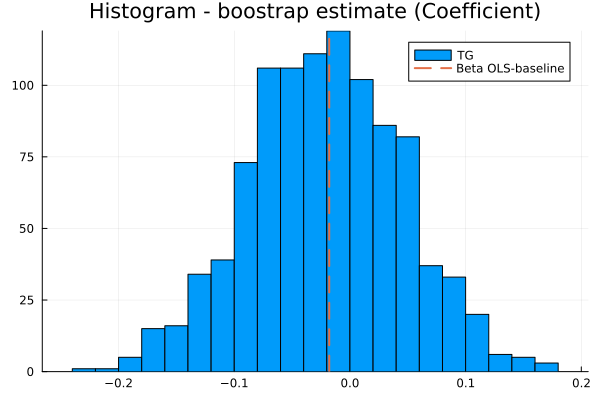

In [119]:
histogram(tg_estimate, label = "TG")
plot!( xlim=xlims(), label = " ", title = "Histogram - boostrap estimate (Coefficient)")
vline!( [-0.0179147], linestyle = :dash , label = "Beta OLS-baseline", lw=2)

#### 4.2 Histogram Coeficient - Female

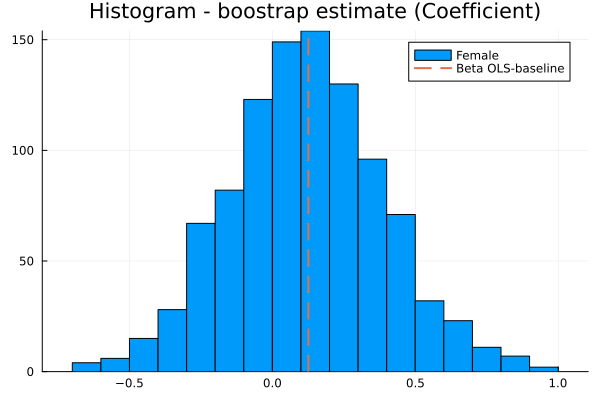

In [120]:
histogram(fem_estimate, label = "Female")
plot!( xlim=xlims(), label = " ", title = "Histogram - boostrap estimate (Coefficient)")
vline!( [0.12581], linestyle = :dash , label = "Beta OLS-baseline", lw=2)

#### 4.3 Histogram Coeficient - Female

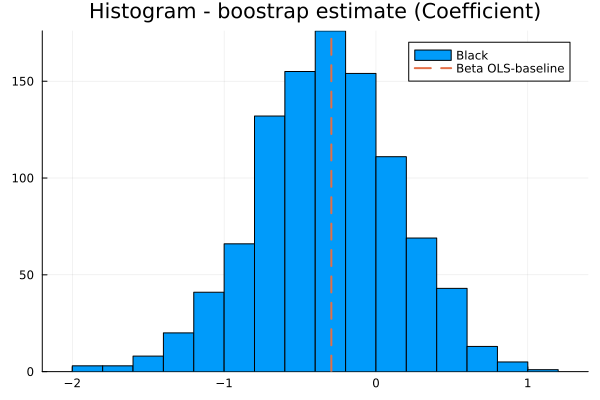

In [121]:
histogram(black_estimate, label = "Black")
plot!( xlim=xlims(), label = " ", title = "Histogram - boostrap estimate (Coefficient)")
vline!( [-0.293971], linestyle = :dash , label = "Beta OLS-baseline", lw=2)

In [ ]:
#### 4.4 Table - Results

In [122]:
table = [["tg","female","black"],[mean_tg,mean_fem,mean_black],[std_tg,std_fem,std_black]]
T = DataFrame(table, [ :"Variable", :"Coefficient (boostrap)", :"Standard error (boostrap)"]) 

Row,Variable,Coefficient (boostrap),Standard error (boostrap)
,String,Float64,Float64
1,tg,-0.0214703,0.0660314
2,female,0.121202,0.268135
3,black,-0.324413,0.465296
